# 運用 OSMnx 分析交通路網
### 分析臺北市 OpenStreetMap 資料
<div style="text-align: right;">台大Python訓練課程326 - 陳瑞霖</div>

## 運用套件和資料
* 套件：OSMnx

* 相依性：Pandas、GeoPandas、Numpy、Networkx

因為套件衝突緣故，需要新建置虛擬環境後才安裝得了 OSMnx

資料來源：OpenSteetMap (osm.org)

  * 中文名稱：開放街圖

  * 地圖版維基百科，人人能編輯修改，編輯完即生效

  * 知名使用者：Pokemon Go、Facebook、實價登錄地圖、無人機地圖

  * 在臺灣有活躍繪製地圖社群

OpenStreetMap 被視作 Google 地圖的替代品，因為 Google 提高費用，導致不少開發者需要尋求其他的方案。OpenStreetMap 其資料能自由截取並且在不同的程式中做出分析工作。

## OpenStreetMap 與 Python
* OSMApi
* OSMPythonTools
  * OSMPythonTools.Api
  * OSMPythonTools.Nominatim
  * OSMPythonTools.Data
  * OSMPythonTools.Element
  * OSMPythonTools.Overpass
* <strong>OSMnx</strong>

In [ ]:
pip OSMPythonTools

無法用 conda 安裝，視你的作業系統和環境決定是用 pip 還是 pip3 指令

In [1]:
from OSMPythonTools.nominatim import Nominatim # geocoder 部分
nominatim = Nominatim()
taipei = nominatim.query('Taipei') # 運用 geocoder Nominatim 搜尋台北市

In [2]:
taipei.toJSON() # 顯示所有 Taipei 的搜尋結果

[{'place_id': 11881100,
  'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
  'osm_type': 'node',
  'osm_id': 1147314253,
  'boundingbox': ['24.8775198', '25.1975198', '121.4036796', '121.7236796'],
  'lat': '25.0375198',
  'lon': '121.5636796',
  'display_name': '臺北市, 信義區, 臺北市, 11008, Taiwan',
  'class': 'place',
  'type': 'city',
  'importance': 0.6456935036634132,
  'icon': 'https://nominatim.openstreetmap.org/images/mapicons/poi_place_city.p.20.png'},
 {'place_id': 235324883,
  'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
  'osm_type': 'relation',
  'osm_id': 1293250,
  'boundingbox': ['24.9605158', '25.2102357', '121.4571436', '121.6658902'],
  'lat': '25.08580655',
  'lon': '121.56435563960218',
  'display_name': '臺北市, Taiwan',
  'class': 'boundary',
  'type': 'administrative',
  'importance': 0.6456935036634132,
  'icon': 'https://nominatim.openstreetmap.org/images/mapicons/poi_boundary_administrative.p.2

運用 OSMPytonTools 來先探索臺北市的 OpenStreetMap 資料

In [45]:
taipei.areaId()

3601293250

In [46]:
taipei = nominatim.query('Taipei', wkt=True)
taipei.wkt()
# 'POINT(121.5636796 25.0375198)'

[nominatim] downloading data: Taipei


'POINT(121.5636796 25.0375198)'

In [53]:
from OSMPythonTools.overpass import overpassQueryBuilder
query = overpassQueryBuilder(area=taipei.areaId(), elementType='node', selector='"highway"="bus_stop"', out='body')

In [55]:
from OSMPythonTools.overpass import Overpass
overpass = Overpass()
busStops = overpass.query(query)

[overpass] downloading data: [timeout:25][out:json];area(3601293250)->.searchArea;(node["highway"="bus_stop"](area.searchArea);); out body;


In [56]:
busStops.elements()

 ...]

In [57]:
busStops.nodes()

 ...]

In [59]:
busStops.countElements()

3158

In [68]:
busStops.elements()[0].tags()

{'bus': 'yes',
 'highway': 'bus_stop',
 'name': '大湖',
 'name:en': 'Dahu Shanzhuang',
 'name:zh': '大湖',
 'nat_ref': 'TPE24779',
 'network': '臺北市公車',
 'public_transport': 'platform',
 'ref': '24779',
 'source': 'PTX',
 'source:date': '2018-01-30T04:04:24+08:00'}

In [ ]:
pip install overpy

In [ ]:
import overpy

api = overpy.Overpass()

In [ ]:
conda osmnx


環境設定搞老半天，最後靠新建新的虛擬環境，才成功安裝 OSMnx，以及相關的相依套件。

In [3]:
import osmnx as ox
import matplotlib.pyplot as plt # 輸出圖表用
%matplotlib inline

ox.config(log_console=True, use_cache=True)
ox.__version__

'0.11.4'

匯入 osmnx 還有相關需要的套件，如畫圖的 Matplotlib

In [4]:
place = {'state' : '臺北市',
         'country' : 'TW'} # 採字典方式搜尋臺北市範圍的資料
G = ox.graph_from_place(place)

這裡採用字典輸入要搜尋地方

In [5]:
ox.stats.basic_stats(G, area=None, clean_intersects=False, tolerance=15, circuity_dist='gc')

{'n': 54576,
 'm': 145729,
 'k_avg': 5.340406039284667,
 'intersection_count': 47635,
 'streets_per_node_avg': 3.0341175608326005,
 'streets_per_node_counts': {0: 0,
  1: 6941,
  2: 100,
  3: 32274,
  4: 14785,
  5: 390,
  6: 74,
  7: 3,
  8: 9},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.12718044561712108,
  2: 0.0018323072412782175,
  3: 0.591358839050132,
  4: 0.27090662562298445,
  5: 0.0071459982409850485,
  6: 0.001355907358545881,
  7: 5.496921723834653e-05,
  8: 0.00016490765171503957},
 'edge_length_total': 8859332.271000048,
 'edge_length_avg': 60.7932001935102,
 'street_length_total': 5110626.368000086,
 'street_length_avg': 61.76879267084153,
 'street_segments_count': 82738,
 'node_density_km': None,
 'intersection_density_km': None,
 'edge_density_km': None,
 'street_density_km': None,
 'circuity_avg': 1.083158266251903,
 'self_loop_proportion': 0.0013655483808987915,
 'clean_intersection_count': None,
 'clean_intersection_density_km': None}

傳回基本的統計資訊

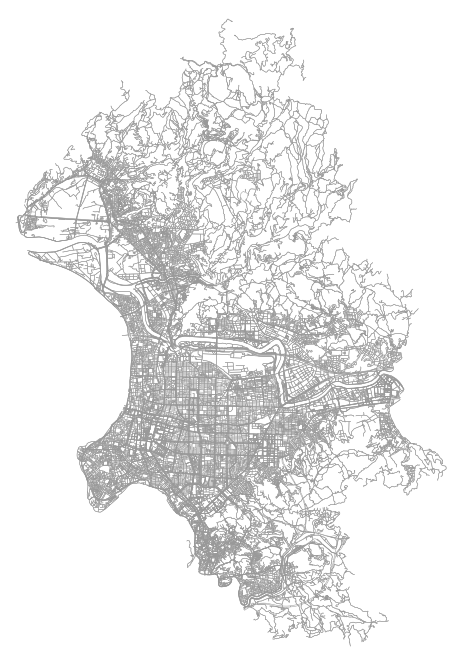

In [6]:
fig, ax = ox.plot_graph(G, fig_height=12, node_size=0, edge_linewidth=0.5)

傳回臺北市範圍內的道路網

In [7]:
area = ox.gdf_from_place(place)

轉換 place 變成 GeoPandas 能處理的類型

In [8]:
type(area)

geopandas.geodataframe.GeoDataFrame

發現 area 是屬於 GeoPandas 的 GeoDataFrame 類型物件

In [9]:
area

,geometry,place_name,bbox_north,bbox_south,bbox_east,bbox_west
0,"POLYGON ((121.45714 25.10798, 121.45730 25.107...","Taipei, Taiwan",25.210236,24.960516,121.66589,121.457144


傳回臺北市的最東、西、南、北的邊界

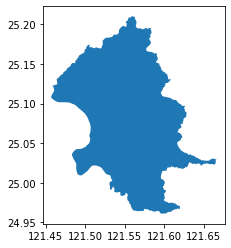

In [10]:
area.plot()

用 Matplotlib 畫出臺北市的範圍

In [11]:
area['geometry']

0    POLYGON ((121.45714 25.10798, 121.45730 25.107...
Name: geometry, dtype: geometry

傳回臺北市的 geometry 數值，以及前幾筆構成 polygram 的點經緯度

In [12]:
buildings = ox.footprints_from_address('Taipei', distance = 12000)

這裡要說明，不能用前面搜尋來的臺北市 place 變數，因為不能接受 dictionary 性質的變數，因此重新搜尋，來找臺北市的建築

In [13]:
len(buildings)

55403

回傳建築物數量

In [14]:
buildings.head(3)

,nodes,addr:city,addr:country,addr:district,addr:housenumber,addr:postcode,addr:street,alt_name:nan,building,building:height,...,service_times,addr:street:name,railway,station,changing_table,members,building:architecture,type,communication:television,code
23641610,"[256123178, 3541337794, 6939419004, 3541337394...",臺北市,TW,中正區,3,10041,北平西路,台北車頭,train_station,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25202548,"[274799189, 4206516119, 4206516120, 274799190,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,hotel,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25203288,"[274807465, 2837728025, 274807467, 2837728023,...",臺北市,TW,中山區,1,10452,玉門街,NaN,yes,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


傳回前三筆建築資料，先大略看資料的情形

In [15]:
buildings.columns

Index(['nodes', 'addr:city', 'addr:country', 'addr:district',
       'addr:housenumber', 'addr:postcode', 'addr:street', 'alt_name:nan',
       'building', 'building:height',
       ...
       'service_times', 'addr:street:name', 'railway', 'station',
       'changing_table', 'members', 'building:architecture', 'type',
       'communication:television', 'code'],
      dtype='object', length=405)

觀察 OpenStreetMap 資料當中，建築物有那些欄位

In [16]:
# 截取餐聽
restaurants = ox.pois_from_place(place, amenities=['restaurant'])

# 全台北市有幾間餐廳?
len(restaurants)

7116

In [17]:
# 有那些欄位
restaurants.columns

Index(['osmid', 'geometry', 'addr:city', 'addr:country', 'addr:district',
       'addr:housenumber', 'addr:postcode', 'addr:street', 'amenity',
       'cuisine',
       ...
       'nodes', 'building', 'tourism', 'ref:zh', 'heritage', 'historic',
       'building:levels', 'name:zh-TW', 'ss', 'building:min_level'],
      dtype='object', length=210)

In [40]:
# Select some useful cols and print
cols = ['name', 'name:en', 'cuisine', 'addr:street', 'takeaway', 'delivery']
# Print only selected cols
restaurants[cols].head(10)

,name,name:en,cuisine,addr:street,takeaway,delivery
283374380,温德德式烘焙餐館,Wendel's bakery and bistro,german,德行西路,NaN,NaN
299002404,N.Y.Bagels Cafe,NaN,american,NaN,NaN,NaN
469812996,西堤,TASTy,steak_house,重慶南路一段,NaN,no
569950080,various,NaN,NaN,NaN,NaN,NaN
569950081,上品早餐坊,NaN,NaN,NaN,NaN,NaN
569950082,Schwarzwald,NaN,german,NaN,NaN,NaN
569950704,Honey Pig,NaN,korean,信義路四段,NaN,NaN
738612589,台科大第一學生餐廳,NaN,NaN,NaN,NaN,NaN
743174782,希臘佐巴,Greek Go,NaN,NaN,NaN,NaN
868325300,樂雅樂,Royal Host,NaN,NaN,NaN,NaN


In [19]:
# 截取道路網的線條和交叉點
nodes, edges = ox.graph_to_gdfs(G)

In [20]:
nodes.head()

,y,x,osmid,highway,ref,geometry
1681391622,25.041855,121.615098,1681391622,NaN,NaN,POINT (121.61510 25.04186)
4961054035,25.036021,121.564997,4961054035,NaN,NaN,POINT (121.56500 25.03602)
4961054036,25.035908,121.564994,4961054036,NaN,NaN,POINT (121.56499 25.03591)
4197428766,24.995026,121.544782,4197428766,NaN,NaN,POINT (121.54478 24.99503)
4961054037,25.036175,121.565007,4961054037,NaN,NaN,POINT (121.56501 25.03617)


路網當中的交叉點資訊

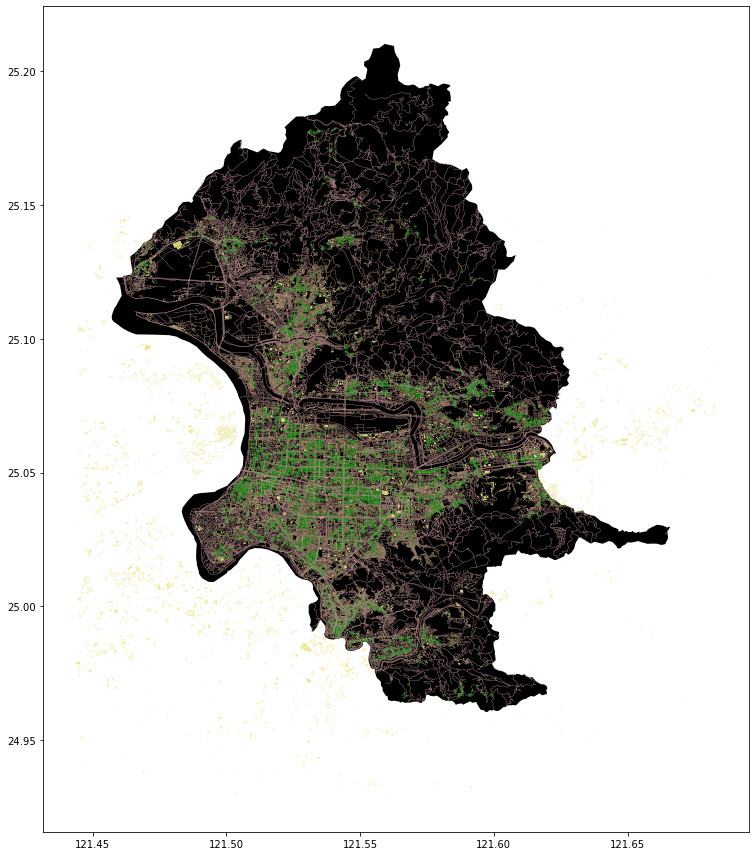

In [43]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(18,12))

# Plot the footprint
area.plot(ax=ax, facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=0.2, edgecolor='#BC8F8F')

# Plot buildings
buildings.plot(ax=ax, facecolor='khaki', alpha=0.9)

# Plot restaurants
restaurants.plot(ax=ax, color='green', alpha=0.9, markersize=2)
plt.tight_layout()

來畫圖，臺北市範圍為背景，加上道路網、建築與餐廳

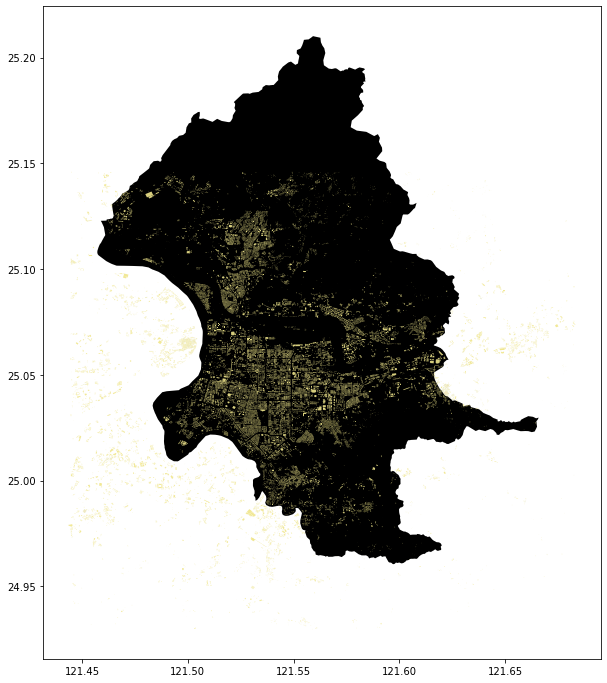

In [22]:
fig, ax = plt.subplots(figsize=(18,12))

# Plot the footprint
area.plot(ax=ax, facecolor='black')

# Plot buildings
buildings.plot(ax=ax, facecolor='khaki', alpha=0.9)


由於臺北市的範圍太大，因此獨立輸出一張臺北市的建築分佈圖

In [23]:
from pyproj import CRS

# Set projection
projection = CRS.from_epsg(3826) #TWD97 投影

# Re-project layers
area2 = area.to_crs(projection)
edges2 = edges.to_crs(projection)
buildings2 = buildings.to_crs(projection)
restaurants2 = restaurants.to_crs(projection)

轉換座標系統，變成 TWD97

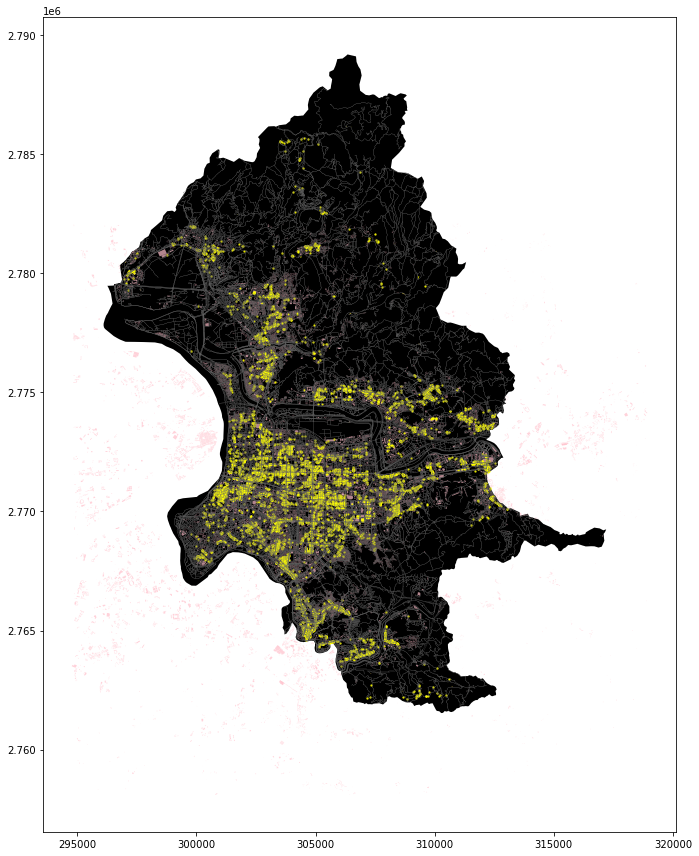

In [44]:
fig, ax = plt.subplots(figsize=(18,12))

# Plot the footprint
area2.plot(ax=ax, facecolor='black')

# Plot street edges
edges2.plot(ax=ax, linewidth=0.2, edgecolor='dimgray')

# Plot buildings
buildings2.plot(ax=ax, facecolor='pink', alpha=0.7)

# Plot restaurants
restaurants2.plot(ax=ax, color='yellow', alpha=0.7, markersize=2)
plt.tight_layout()

重新輸出投影為 TWD97

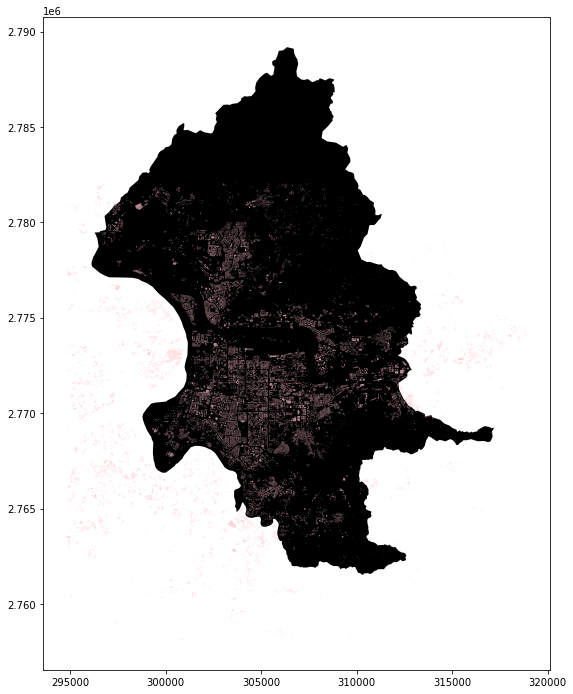

In [26]:
fig, ax = plt.subplots(figsize=(18,12))

# Plot the footprint
area2.plot(ax=ax, facecolor='black')

# Plot buildings
buildings2.plot(ax=ax, facecolor='pink', alpha=0.7)

重新投影後，臺北市的建築分佈圖

In [27]:
import numpy as np
import osmnx as ox
import networkx as nx

from sklearn.neighbors import KDTree
import folium
import matplotlib.pyplot as plt

%matplotlib inline

來畫出最短路徑分析

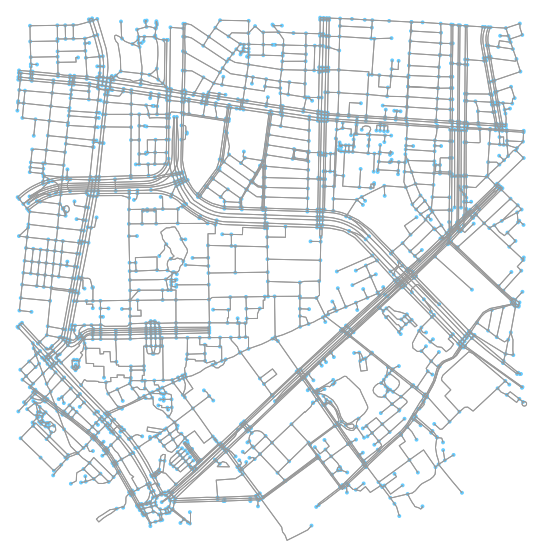

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1361add10>)

In [32]:
# 從台大大門製作方圓 1000 公尺的路網
main_gate = (25.01690, 121.53337)
information = (25.01938, 121.54138)
G = ox.graph_from_point(information, distance=1000, network_type='walk') # quick plot
ox.plot_graph(G, fig_height=10, fig_width=10)

台大德田館週邊的 1 公里的路網

In [33]:
main_gate_node = ox.get_nearest_node(G, main_gate)
information_node = ox.get_nearest_node(G, information)
main_gate_node, information_node

(2179826562, 321562768)

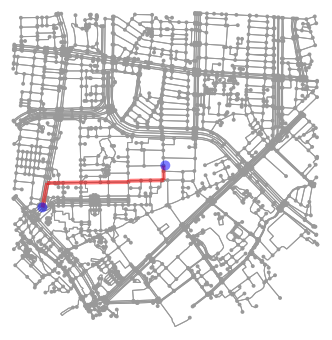

In [34]:
route = nx.shortest_path(G, source=main_gate_node, target=information_node, weight='length')

fig, ax = ox.plot_graph_route(G, route, origin_point=main_gate, destination_point=information)

計算大門至德田館的最短路徑

In [35]:
import osmnx as ox
import matplotlib.pyplot as plt # 輸出圖表用
%matplotlib inline
from IPython.display import Image # 輸出影像

ox.config(log_console=True, use_cache=True)
ox.__version__

'0.11.4'

這裡顯示比較趣味的東西，一英里範圍內的都市道路紋理

In [36]:
# configure the inline image display
img_folder = 'images'
extension = 'png'
size = 360
dpi = 60

設定 iPython 的 image 模組，設定輸出的圖片大小

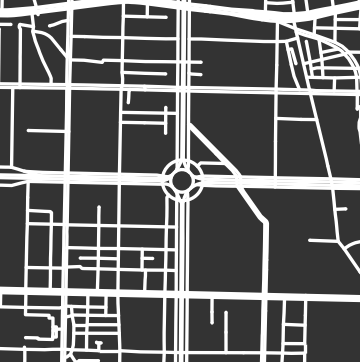

In [37]:
place = 'Taipei' # 仁愛路圓環
point = (25.0378418,121.5487334)
fig, ax = ox.plot_figure_ground(point=point, filename=place, dpi=dpi, network_type='drive')
Image('{}/{}.{}'.format(img_folder, place, extension), height=size, width=size)

輸出黑底白線的道路網圖片

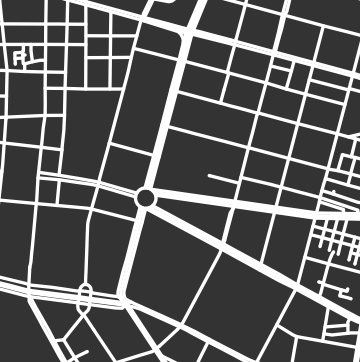

In [38]:
place = 'Taipai West' # 東門圓環
point = (25.0397, 121.5192)
fig, ax = ox.plot_figure_ground(point=point, filename=place, network_type='drive', dpi=dpi)
Image('{}/{}.{}'.format(img_folder, place, extension), height=size, width=size)

台北的東門圓環一帶

## 謝謝大家

Jupyter Notebook 連結：[SupaplexTW](https://github.com/Supaplextw/)@Github - [OSMnx Taipei.ipynb](https://github.com/Supaplextw/OpenStreetMap-Python/blob/master/OSMnx%20Taipei.ipynb)

參考資料

* [OSMnx Example](https://github.com/gboeing/osmnx-examples/blob/master/notebooks)：[路網分析](https://github.com/gboeing/osmnx-examples/blob/master/notebooks/06-example-osmnx-networkx.ipynb)
* [赫爾辛基大學 Geo-Python-AutoGIS 課程-Retrieving OpenStreetMap data](https://automating-gis-processes.github.io/2017/lessons/L7/retrieve-osm-data.html)
* [OSMnx 說明文件](https://osmnx.readthedocs.io/en/stable/osmnx.html)
* [Day20 OSMnx應用 ](https://ithelp.ithome.com.tw/articles/10207981?sc=iThelpR)
* [Reveal.js](https://revealjs.com/)